In [7]:
import time
import random
from tqdm.notebook import tqdm

import nba_api
from nba_api.stats.static import teams
from nba_api.stats.endpoints import commonteamroster, playergamelog

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as mpatches


# data part

In [9]:
# cooldown to avoid nba blocking traffic
nba_cooldown = random.gammavariate(alpha=9, beta=0.4)

### get single player box scores

In [11]:
player_id = 1628983
this_season = 2020

box_scores_this_season = playergamelog.PlayerGameLog(player_id = player_id, season = this_season).get_data_frames()[0]
time.sleep(nba_cooldown)
box_scores_last_season = playergamelog.PlayerGameLog(player_id = player_id, season = this_season - 1).get_data_frames()[0]
time.sleep(nba_cooldown)

### get all players box scores for a team

In [ ]:
abbreviation = 'okc'

# get team id by team abbreviation
team_info = teams.find_team_by_abbreviation(abbreviation)
team_id = team_info['id']

# use team id to get roster
team_roster = commonteamroster.CommonTeamRoster(team_id = team_id).get_data_frames()
time.sleep(nba_cooldown)
team_roster = team_roster[0][['PLAYER', 'PLAYER_ID']]

# create dict to hold box scores dataframe for each player
roster_box_scores = {}
this_season = 2020

# iterate through the roster dataframe
# get box scores for every player on a team
with tqdm(total = len(team_roster), desc = 'Accessing NBA stats API', unit = 'player') as pbar:
    for index, row in tqdm(team_roster.iterrows()):
        player_id = row['PLAYER_ID']
        box_scores_this_season = playergamelog.PlayerGameLog(player_id = player_id, season = this_season).get_data_frames()[0]
        time.sleep(nba_cooldown)
        box_scores_last_season = playergamelog.PlayerGameLog(player_id = player_id, season = this_season - 1).get_data_frames()[0]
        time.sleep(nba_cooldown)
        roster_box_scores[row['PLAYER_ID']] = box_scores
        pbar.update()

# stats part
test stats calculation and storage with SGA on 2019

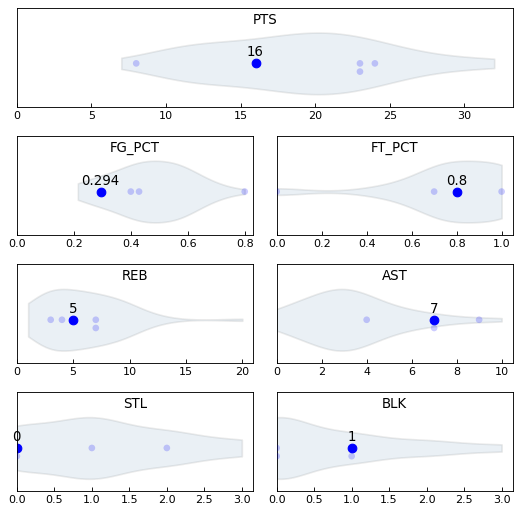

In [93]:
sns.color_palette("coolwarm", as_cmap=True)

fig = plt.figure(figsize=(8,8), constrained_layout = False, dpi = 80)

# create subplots
gs = fig.add_gridspec(4, 2)

def violin_swarm_box_scores(ax, violin_data, swarm_data, stat_header):
    # points subplot
    ax.set_title(stat_header, y=1.0, pad=-14)
    ax.get_yaxis().set_visible(False)
    ax.tick_params(direction = 'in')
    sns.violinplot(fig = fig,
                   ax = ax,
                   data = box_scores_last_season[stat_header],
                   orient = 'h',
                   width = 0.5,
                   legend = False,
                   scale = 'area',
                   inner = None, 
                   cut = 0,
                   bw = 0.5)
    plt.setp(ax.collections, alpha = 0.1)
    plt.scatter(box_scores_this_season[stat_header][0], 0, marker='o', s=60, c = 'blue')
    ax.annotate(box_scores_this_season[stat_header][0], (box_scores_this_season[stat_header][0], 0), textcoords = 'offset pixels', xytext = (0, 7), fontsize = 12, horizontalalignment='center')
    sns.swarmplot(box_scores_this_season[stat_header][1:], np.zeros(len(box_scores_this_season[stat_header]) - 1), ax = ax, orient = 'h', color = 'blue', alpha = 0.2, size = 6)
    ax.set_xlim(left = 0)
    ax.set_ylim(bottom = -0.35, top = 0.45)
    ax.axes.get_xaxis().get_label().set_visible(False)

ax1 = fig.add_subplot(gs[0, 0:2])
violin_swarm_box_scores(ax1, box_scores_last_season, box_scores_this_season, 'PTS')

ax2 = fig.add_subplot(gs[1, 0:1])
violin_swarm_box_scores(ax2, box_scores_last_season, box_scores_this_season, 'FG_PCT')

ax3 = fig.add_subplot(gs[1, 1:2])
violin_swarm_box_scores(ax3, box_scores_last_season, box_scores_this_season, 'FT_PCT')

ax4 = fig.add_subplot(gs[2, 0:1])
violin_swarm_box_scores(ax4, box_scores_last_season, box_scores_this_season, 'REB')

ax5 = fig.add_subplot(gs[2, 1:2])
violin_swarm_box_scores(ax5, box_scores_last_season, box_scores_this_season, 'AST')

ax6 = fig.add_subplot(gs[3, 0:1])
violin_swarm_box_scores(ax6, box_scores_last_season, box_scores_this_season, 'STL')

ax7 = fig.add_subplot(gs[3, 1:2])
violin_swarm_box_scores(ax7, box_scores_last_season, box_scores_this_season, 'BLK')

plt.subplots_adjust(hspace = 0.3, wspace = 0.1)

In [64]:
plt.subplots_adjust(hspace = 0.3, wspace = 1)

1     8
2    23
3    23
4    24
Name: PTS, dtype: int64